# VGG-19

It is a convolutional neural network (CNN) architecture for image classification using deep learning.

VGG-19 is a trained Convolutional Neural Network, from Visual Geometry Group, Department of Engineering Science, University of Oxford. The number 19 stands for the number of layers with trainable weights. 

## GPU performance

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.2603 - acc: 0.9245 - val_loss: 0.1361 - val_acc: 0.9600
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1063 - acc: 0.9683 - val_loss: 0.0922 - val_acc: 0.9710
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0699 - acc: 0.9791 - val_loss: 0.0789 - val_acc: 0.9754
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0507 - acc: 0.9849 - val_loss: 0.0756 - val_acc: 0.9767
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0383 - acc: 0.9882 - val_loss: 0.0697 - val_acc: 0.9781
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0286 - acc: 0.9913 - val_loss: 0.0690 - val_acc: 0.9791
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0226 - acc: 0.9934 - val_loss: 0.0694 - val_acc

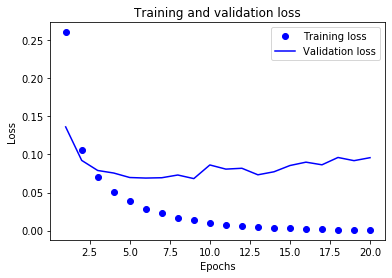

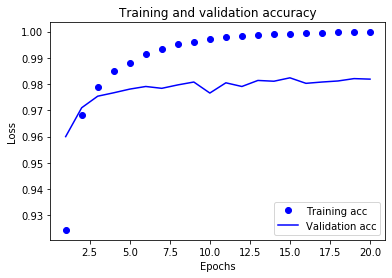

In [27]:
import os
import plaidml
from plaidml import keras

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['acc'])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

history = network.fit(train_images, train_labels, epochs=20, batch_size=128,validation_data=(test_images, test_labels))

#test_loss, test_acc =network.evaluate(test_images, test_labels)
#print('test_acc:', test_acc)

history_dict = history.history

import matplotlib.pyplot as plt
history_dict = history.history
acc =  history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## CPU performance

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2567 - acc: 0.9256 - val_loss: 0.1312 - val_acc: 0.9590
Epoch 2/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1029 - acc: 0.9693 - val_loss: 0.0880 - val_acc: 0.9722
Epoch 3/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0689 - acc: 0.9793 - val_loss: 0.0895 - val_acc: 0.9734
Epoch 4/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0494 - acc: 0.9851 - val_loss: 0.0723 - val_acc: 0.9785
Epoch 5/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0375 - acc: 0.9881 - val_loss: 0.0703 - val_acc: 0.9782
Epoch 6/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0290 - acc: 0.9912 - val_loss: 0.0594 - val_acc: 0.9815
Epoch 7/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0215 - acc: 0.9936 - val_loss: 0.

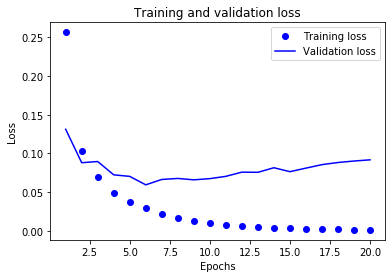

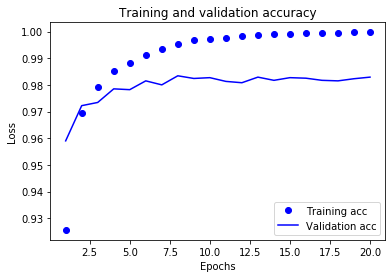

In [28]:
import os
import tensorflow
from tensorflow import keras

os.environ["KERAS_BACKEND"] = "tensorflow"

from keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['acc'])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

history = network.fit(train_images, train_labels, epochs=20, batch_size=128,validation_data=(test_images, test_labels))

#test_loss, test_acc =network.evaluate(test_images, test_labels)
#print('test_acc:', test_acc)

history_dict = history.history

import matplotlib.pyplot as plt
history_dict = history.history
acc =  history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()